# Analyse Exploratoire des Données (EDA)

Ce notebook présente l’analyse exploratoire des données utilisées dans le projet F1.  
L’objectif est de mieux comprendre la structure des données, identifier les valeurs manquantes, explorer les distributions et repérer les variables pertinentes pour la modélisation future.


## Table des matières

1. [Chargement des données](#Chargement-des-données)  
2. [Structure générale des données](#Structure-générale-des-données)  
3. [Analyse des valeurs manquantes](#Analyse-des-valeurs-manquantes)  
4. [Analyse univariée](#Analyse-univariée)  
5. [Distribution des cibles de classification](#Distribution-des-cibles-de-classification)  
6. [Analyse des corrélations](#Analyse-des-corrélations)  
7. [Analyse bivariée](#Analyse-bivariée)  
8. [Effet domicile](#Effet-domicile)  
9. [Analyse par tranches d’âge](#Analyse-par-tranches-dâge)  
10. [Analyse par nationalité](#Analyse-par-nationalité)  
11. [Analyse par écurie](#Analyse-par-écurie)  
12. [Impact du circuit](#Impact-du-circuit)  
13. [Impact de la position de départ (grid)](#Impact-de-la-position-de-départ-grid)  
14. [Transition vers la régression](#Transition-vers-la-régression)  
15. [Conclusion de l’EDA](#Conclusion-de-lEDA)


## Chargement des données

Nous commençons par charger le jeu de données préparé précédemment (`data_filter.csv`). Ce jeu contient les informations essentielles sur les courses, les pilotes, les écuries et plusieurs cibles de classification, générées via le script `prepare_filter_data.py`.

Un premier aperçu permet de vérifier la structure générale : colonnes, types de données, valeurs manquantes, etc.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Affichage plus large dans le notebook
pd.set_option('display.max_columns', None)

# Chargement du fichier préparé
df = pd.read_csv("../data/data_filter.csv")
df.head()


C:\Users\rapha\AppData\Local\Temp\ipykernel_33176\3476465060.py:9: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/data_filter.csv")


,grid,position,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,year,races_name,status,driver_nationality_1,driver_nationality_2,driver_age,driver_name,constructor_name,constructor_nationality,target_finish_race,target_podium,target_top10,target_gain_position,target_beat_teammate,laps_completed,time_total_seconds,final_position,gained_positions,team_points,finished_race,fastestLapTime_missing,rank_missing,gp_nationality,is_home_race
0,1,1.0,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,2008,Australian Grand Prix,Finished,British,NaN,23,Lewis Hamilton,McLaren,British,1,1,1,0,1,58,5690.616,1,0,14.0,1,0,0,Australian,0
1,5,2.0,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,2008,Australian Grand Prix,Finished,German,NaN,31,Nick Heidfeld,BMW Sauber,German,1,1,1,1,1,58,5696.094,2,3,8.0,1,0,0,Australian,0
2,7,3.0,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,2008,Australian Grand Prix,Finished,German,NaN,23,Nico Rosberg,Williams,British,1,1,1,1,1,58,5698.779,3,4,9.0,1,0,0,Australian,0
3,11,4.0,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,2008,Australian Grand Prix,Finished,Spanish,NaN,27,Fernando Alonso,Renault,French,1,0,0,1,1,58,5707.797,4,7,5.0,1,0,0,Australian,0
4,3,5.0,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,2008,Australian Grand Prix,Finished,Finnish,NaN,27,Heikki Kovalainen,McLaren,British,1,0,1,0,0,58,5708.630,5,-2,14.0,1,0,0,Australian,0


## Structure générale des données

On examine ici la structure du DataFrame : le nombre de lignes et de colonnes, les types de données, et la présence de valeurs manquantes.

Cela permet d’identifier rapidement les variables numériques, catégorielles, et de repérer des colonnes à traiter plus tard (ex. codage, imputation, etc.).


In [22]:
df.shape  # Dimensions
df.info()  # Types + valeurs manquantes
df.describe()  # Statistiques globales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   grid                     26759 non-null  int64  
 1   position                 15806 non-null  float64
 2   positionOrder            26759 non-null  int64  
 3   points                   26759 non-null  float64
 4   laps                     26759 non-null  int64  
 5   time                     7680 non-null   object 
 6   milliseconds             7680 non-null   float64
 7   fastestLap               8252 non-null   float64
 8   rank                     26759 non-null  float64
 9   fastestLapTime           26759 non-null  object 
 10  fastestLapSpeed          26759 non-null  float64
 11  year                     26759 non-null  int64  
 12  races_name               26759 non-null  object 
 13  status                   26759 non-null  object 
 14  driver_nationality_1  

,grid,position,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapSpeed,year,driver_age,target_finish_race,target_podium,target_top10,target_gain_position,target_beat_teammate,laps_completed,time_total_seconds,final_position,gained_positions,team_points,finished_race,fastestLapTime_missing,rank_missing,is_home_race
count,26759.000000,15806.000000,26759.000000,26759.000000,26759.000000,7.680000e+03,8252.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,7680.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000
mean,11.134796,8.020499,12.794051,1.987632,46.301768,6.185833e+06,42.732913,85.124183,33.046085,1991.394372,29.918981,0.286782,0.126948,0.483725,0.478680,0.488135,46.301768,6185.832953,12.794051,-1.659255,4.464607,0.286782,0.691618,0.839643,0.092567
std,7.202860,4.840796,7.665951,4.351209,29.496557,1.669306e+06,16.603460,34.090872,76.364589,19.952885,5.294723,0.452267,0.332921,0.499744,0.499555,0.499869,29.496557,1669.306489,7.665951,9.613308,7.797860,0.452267,0.461834,0.366944,0.289830
min,0.000000,1.000000,1.000000,0.000000,0.000000,5.260000e+02,1.000000,0.000000,0.000000,1950.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.526000,1.000000,-39.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,4.000000,6.000000,0.000000,23.000000,5.378454e+06,33.000000,100.000000,0.000000,1977.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,5378.454500,6.000000,-5.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,11.000000,8.000000,12.000000,0.000000,53.000000,5.788194e+06,46.000000,100.000000,0.000000,1991.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,5788.193500,12.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,17.000000,11.000000,18.000000,2.000000,66.000000,6.402676e+06,54.000000,100.000000,0.000000,2009.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,66.000000,6402.676000,18.000000,4.000000,6.000000,1.000000,1.000000,1.000000,0.000000
max,34.000000,33.000000,39.000000,50.000000,200.000000,1.509054e+07,85.000000,100.000000,257.320000,2024.000000,59.000000,1.000000,1.000000,1.000000,1.000000,1.000000,200.000000,15090.540000,39.000000,30.000000,66.000000,1.000000,1.000000,1.000000,1.000000


## Analyse des valeurs manquantes

Nous vérifions ici s’il existe des colonnes avec des valeurs manquantes. Cela permet de décider si une imputation ou une exclusion est nécessaire pour certaines variables.

In [23]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

driver_nationality_2    26755
milliseconds            19079
time                    19079
time_total_seconds      19079
fastestLap              18507
position                10953
gp_nationality            528
dtype: int64

💬 **Analyse des valeurs manquantes :**

- Les colonnes `time`, `milliseconds` et `time_total_seconds` sont partiellement remplies (environ 19 000 valeurs manquantes sur 27 000 lignes). Si elles ne sont pas utilisées pour l’entraînement des modèles, elles peuvent être supprimées.
- Les colonnes `fastestLap` et `position` présentent également des valeurs manquantes, probablement liées à des abandons ou disqualifications, fréquents en F1. La variable `position` peut avantageusement être remplacée par `positionOrder`, qui indique la position finale du pilote de manière plus fiable.
- La colonne `gp_nationality` comporte 528 valeurs manquantes, principalement dues à l’absence de pays clairement défini pour certains Grands Prix (comme le "European Grand Prix"). Ces lignes peuvent être mises de côté dans l’analyse de l’effet domicile.

## Analyse univariée

Nous analysons ici chaque variable individuellement afin d’observer leur distribution. Cela permet d’identifier :
- des **données déséquilibrées** (ex : podiums très rares),
- des **valeurs extrêmes** (outliers),
- ou encore la **nécessité d’un encodage adapté** (catégorielles).

Cela inclut notamment :

- **Variables numériques** : `driver_age`, `rank`, `grid`, `fastestLapSpeed`, `gained_positions`, etc.
- **Variables binaires** (cibles de classification) : `target_podium`, `target_finish_race`, `target_top10`, etc.
- **Variables catégorielles** : `constructor_name`, `driver_nationality`, `races_name`, etc.

Les visualisations ci-dessous permettent d’explorer ces distributions plus en détail.


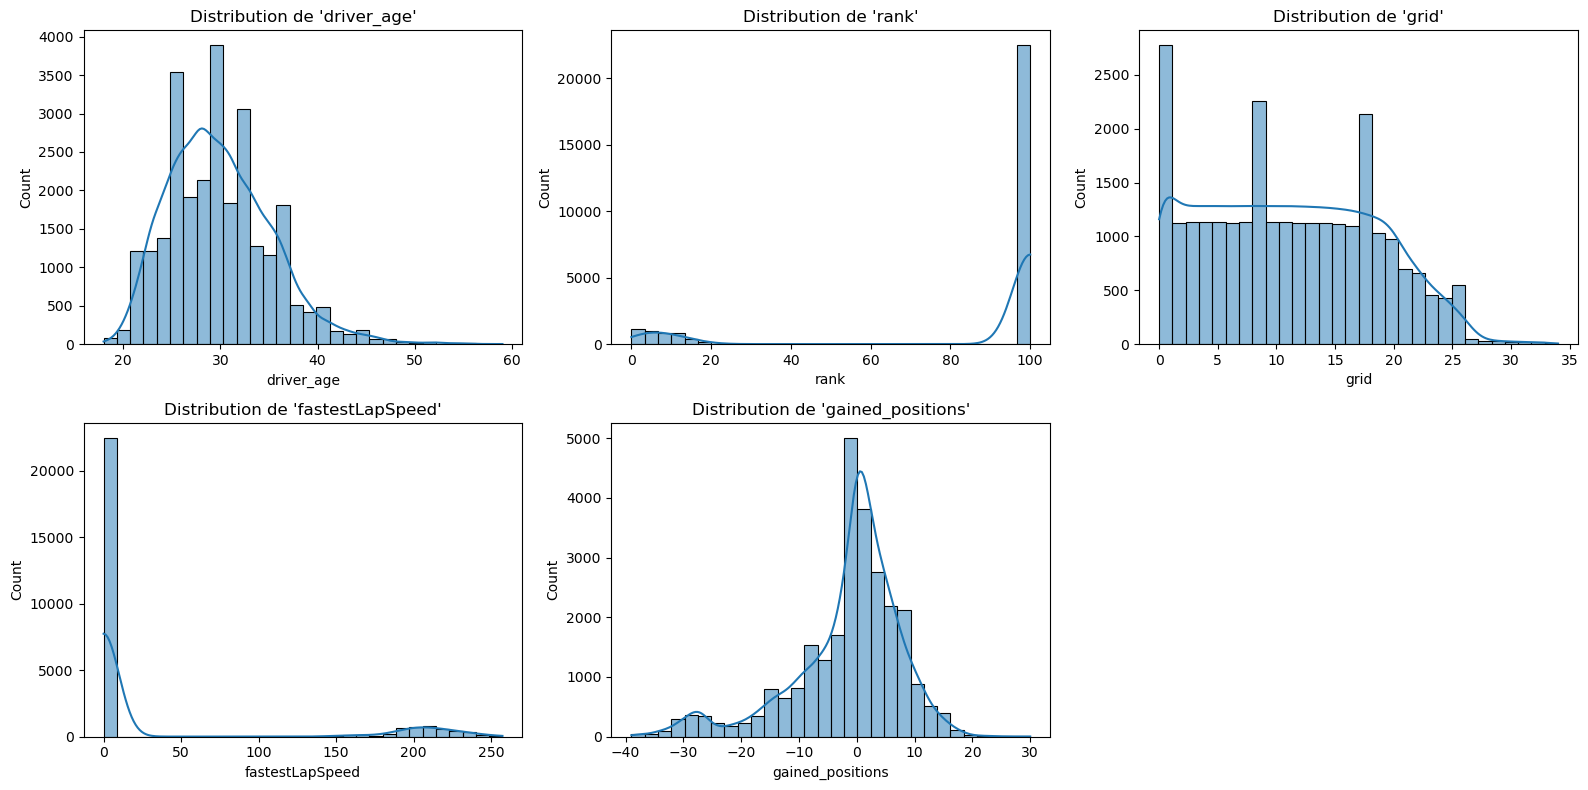

In [24]:
numeric_vars = ["driver_age", "rank", "grid", "fastestLapSpeed", "gained_positions"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
axes = axes.flatten()

for i, var in enumerate(numeric_vars):
    sns.histplot(df[var], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution de '{var}'")

# Supprimer le dernier plot vide s’il y en a
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


💬 **Analyse des distributions numériques :**

- `driver_age` est majoritairement compris entre 25 et 35 ans, ce qui correspond à l’âge typique des pilotes en activité.
- `rank` présente une forte concentration à 100, ce qui correspond à une transformation volontaire des valeurs manquantes (NaN) pour signaler l'absence de tour rapide. Cette valeur doit donc être traitée à part dans les analyses.
- `grid` affiche des pics à certaines positions, probablement liés aux formats de qualification et à l’application de pénalités. La répartition est globalement cohérente.
- `fastestLapSpeed` contient de nombreux zéros, indiquant que certains pilotes n'ont pas enregistré de temps rapide. Cela s'explique notamment par l'absence de données dans les archives plus anciennes, où le meilleur tour n'était pas toujours relevé. Cette variable est donc à considérer avec prudence, voire à exclure selon les modèles.
- `gained_positions` suit une distribution centrée autour de 0. La majorité des pilotes conservent leur position, tandis que d'autres en gagnent ou en perdent un grand nombre, selon les événements de course.


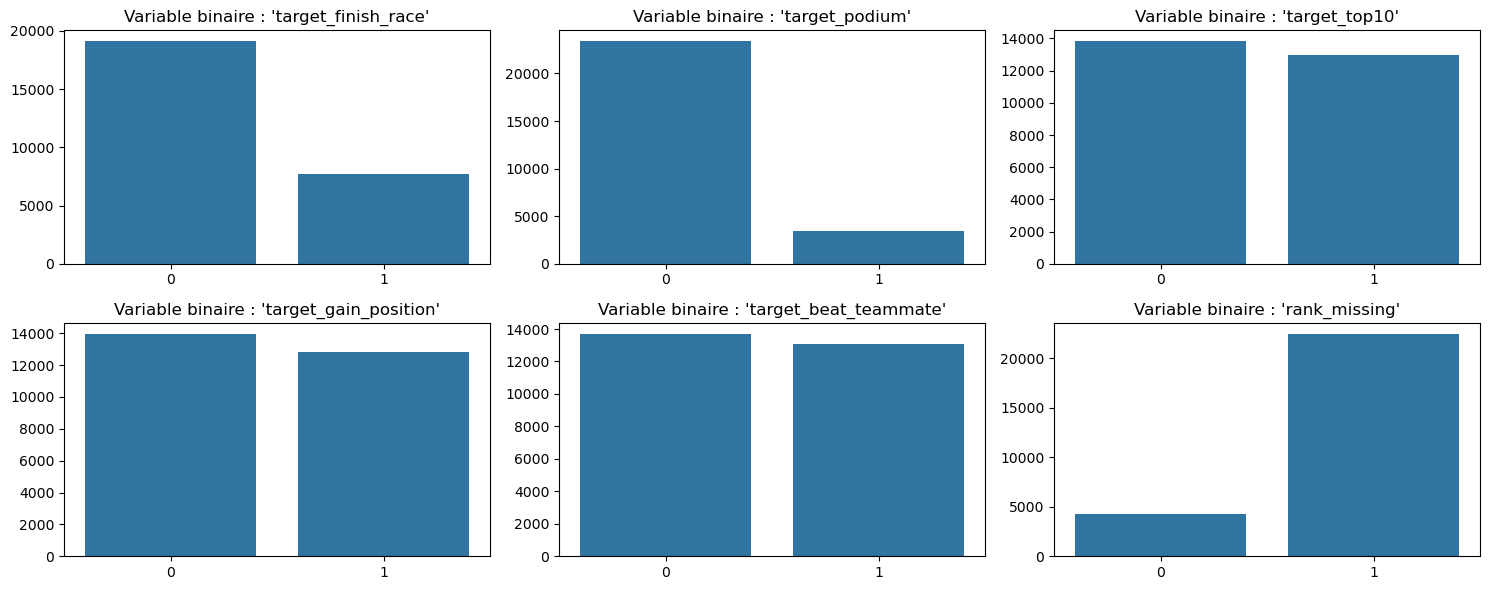

In [25]:
binary_vars = ["target_finish_race", "target_podium", "target_top10", 
               "target_gain_position", "target_beat_teammate", "rank_missing"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))
axes = axes.flatten()

for i, var in enumerate(binary_vars):
    sns.countplot(x=var, data=df, ax=axes[i])
    axes[i].set_title(f"Variable binaire : '{var}'")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()


💬 **Analyse des distributions binaires :**

- `target_finish_race` : environ 70 % des pilotes ne terminent pas la course, ce qui montre un taux d’abandon important.
- `target_podium` : très déséquilibrée, très peu de pilotes finissent sur le podium.
- `target_top10` : la répartition est assez équilibrée, ce qui est favorable pour la classification.
- `target_gain_position` : la majorité des pilotes conservent ou perdent leur position, mais la variable reste relativement bien répartie.
- `target_beat_teammate` : assez équilibrée, ce qui est positif pour prédire cette cible.
- `rank_missing` : une très grande majorité des lignes ont un `rank` manquant (transformé en 100), ce qui confirme qu'il s'agit d'une information souvent absente (abandon, non classé).


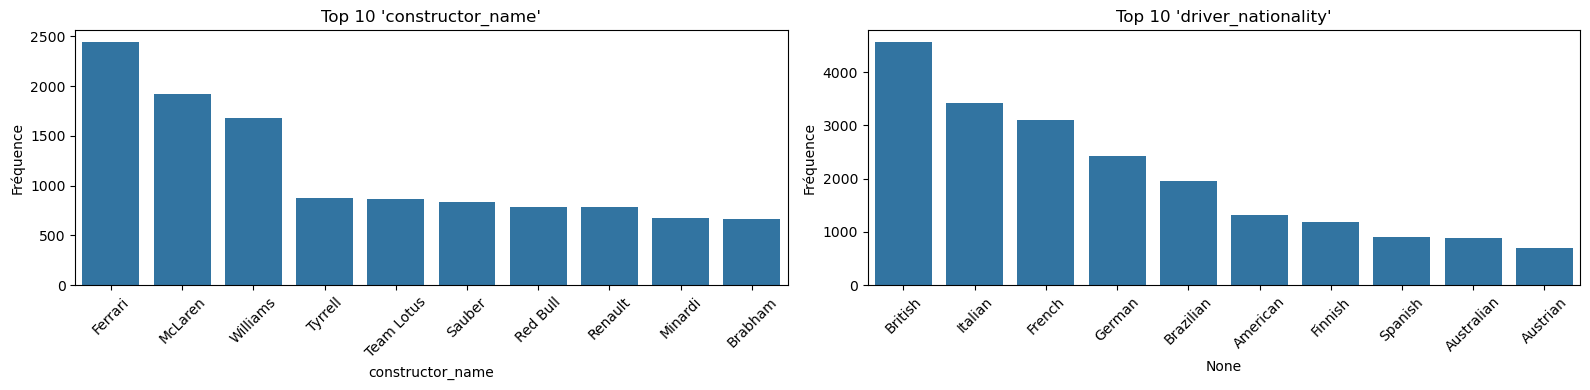

In [26]:
cat_vars = ["constructor_name"]

# On combine les deux colonnes de nationalité
driver_nats = pd.concat([
    df["driver_nationality_1"],
    df["driver_nationality_2"]
]).dropna()

# Top 10 des nationalités pilotes (toutes confondues)
top_nationalities = driver_nats.value_counts().head(10)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# Plot des écuries
top_teams = df["constructor_name"].value_counts().head(10)
sns.barplot(x=top_teams.index, y=top_teams.values, ax=axes[0])
axes[0].set_title("Top 10 'constructor_name'")
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel("Fréquence")

# Plot des nationalités (fusionnées)
sns.barplot(x=top_nationalities.index, y=top_nationalities.values, ax=axes[1])
axes[1].set_title("Top 10 'driver_nationality'")
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel("Fréquence")

plt.tight_layout()
plt.show()


💬 **Analyse des variables catégorielles :**

- `constructor_name` : Ferrari, McLaren et Williams sont les écuries les plus représentées dans l’historique, ce qui reflète leur longévité en F1. On retrouve également des écuries historiques comme Tyrrell ou Lotus, ainsi que des équipes modernes comme Red Bull ou Renault.
  
- `driver_nationality` : Les pilotes britanniques, italiens et français sont les plus nombreux, ce qui correspond aux pays ayant une forte tradition automobile. On observe aussi une bonne représentation des nationalités allemandes, brésiliennes et américaines.

## Distribution des cibles de classification

Les variables cibles que nous chercherons à prédire sont binaires (0 ou 1). Une distribution trop déséquilibrée pourrait affecter la performance des modèles. Il est donc essentiel d’observer leur répartition.

Nous analysons ici :
- le taux de pilotes terminant la course (`target_finish_race`)
- le taux de podiums (`target_podium`)
- les départs dans le top 10 (`target_top10`)
- les gains de position (`target_gain_position`)
- le fait de battre son coéquipier (`target_beat_teammate`)


C:\Users\rapha\AppData\Local\Temp\ipykernel_33176\3100894243.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=df, ax=axes[i], palette="viridis")
C:\Users\rapha\AppData\Local\Temp\ipykernel_33176\3100894243.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=df, ax=axes[i], palette="viridis")
C:\Users\rapha\AppData\Local\Temp\ipykernel_33176\3100894243.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=df, ax=axes[i], palette="viridis")
C:\Users\rapha\AppData\Local\Temp\ipykernel_33176

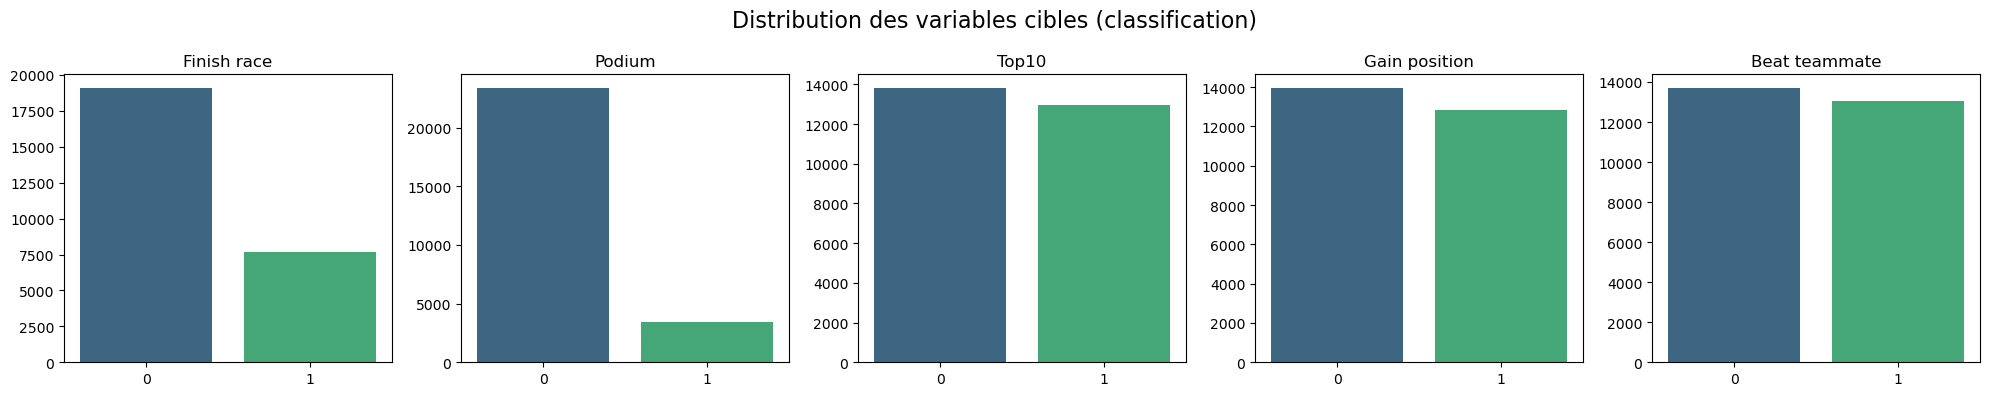

In [27]:
# Liste des variables cibles à visualiser
targets = [
    "target_finish_race",
    "target_podium",
    "target_top10",
    "target_gain_position",
    "target_beat_teammate"
]

# Création d'une figure avec 5 sous-graphes côte à côte
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, target in enumerate(targets):
    sns.countplot(x=target, data=df, ax=axes[i], palette="viridis")
    axes[i].set_title(target.replace("target_", "").replace("_", " ").capitalize())
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.suptitle("Distribution des variables cibles (classification)", fontsize=16)
plt.tight_layout()
plt.show()


💬 On observe que :

- La plupart terminent leur course, mais les abandons restent notables.
- Peu de pilotes montent sur le podium (déséquilibre important).
- Les cibles `top10`, `gain_position` et `beat_teammate` sont assez équilibrées, ce qui est bon pour l'entraînement des modèles.

Cela donne une bonne idée des cibles les plus difficiles à prédire (comme le podium).


## Transition vers la régression

Dans la suite du projet, une autre tâche de machine learning consistera à prédire des quantités continues, comme le nombre de points marqués par un pilote. Cette partie sera abordée dans un notebook distinct dédié à la régression.

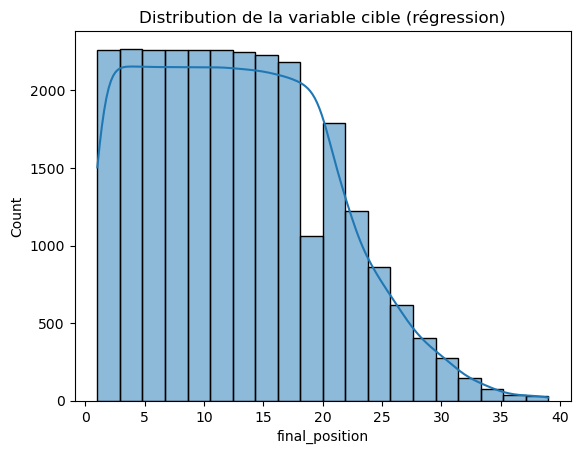

In [28]:
sns.histplot(df['final_position'], bins=20, kde=True)
plt.title("Distribution de la variable cible (régression)")
plt.show()

💬 **Observation sur la variable `final_position` :**

La variable est majoritairement concentrée sur les premières positions (entre 1 et 15), puis décroît progressivement au-delà de la 20e place. Cette distribution s’explique par plusieurs facteurs : les abandons ou non-classés qui n’atteignent pas une position finale élevée, mais aussi le fait qu’historiquement certaines courses comptaient plus de participants qu’aujourd’hui. Cela justifie la présence de données au-delà de la 20e position dans le dataset.

## Analyse des corrélations

Cette heatmap permet de visualiser les corrélations linéaires entre variables numériques. Cela aide à repérer :
- des redondances entre variables (multicolinéarité)
- des relations intéressantes avec les cibles à prédire

Bien que les corrélations ne soient pas exhaustives (surtout pour des variables catégorielles), elles offrent une première piste pour la sélection de variables pertinentes.

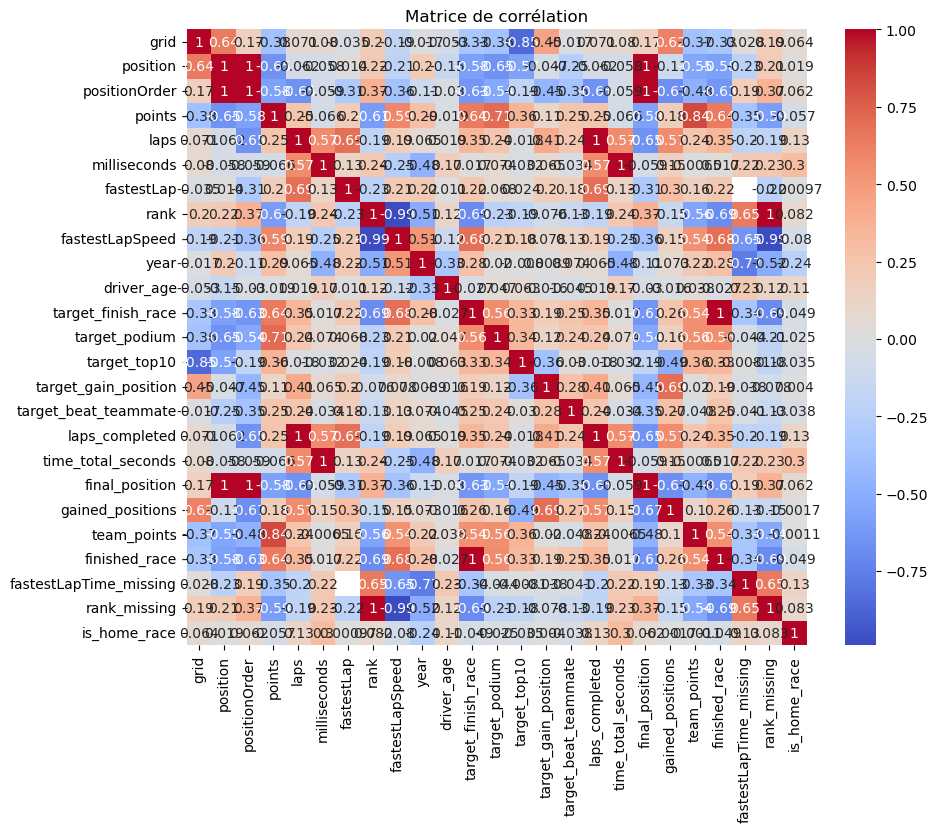

In [29]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

💬 **Analyse de la matrice de corrélation :**

- La variable `grid` (position de départ) est **négativement corrélée** à `points`, `target_top10` et `target_podium`, ce qui signifie que **plus un pilote part devant, plus il a de chances de marquer des points ou finir bien classé**.
- `rank` est fortement corrélée à `finished_race` et `target_finish_race`, car elle est influencée par la présence ou l’absence de meilleur tour.
- `laps_completed` et `time_total_seconds` sont **fortement corrélés avec le fait de finir la course**, ce qui est attendu.
- `team_points` et `points` ont une corrélation logique élevée, puisqu’elles dépendent souvent des mêmes performances.
- Les variables cibles (`target_...`) ne sont pas toutes fortement corrélées entre elles, ce qui indique qu'elles apportent des informations distinctes.

Ces corrélations permettent d’identifier les variables utiles pour les futurs modèles, mais attention : **corrélation ≠ causalité** !


## Analyse bivariée

Nous comparons ici des variables d’entrée avec les cibles, afin de voir si des relations intéressantes apparaissent :
- l’impact de l’âge ou de la grille de départ sur les résultats
- la performance selon les écuries ou nationalités

Ces éléments peuvent guider la sélection de features pertinentes.

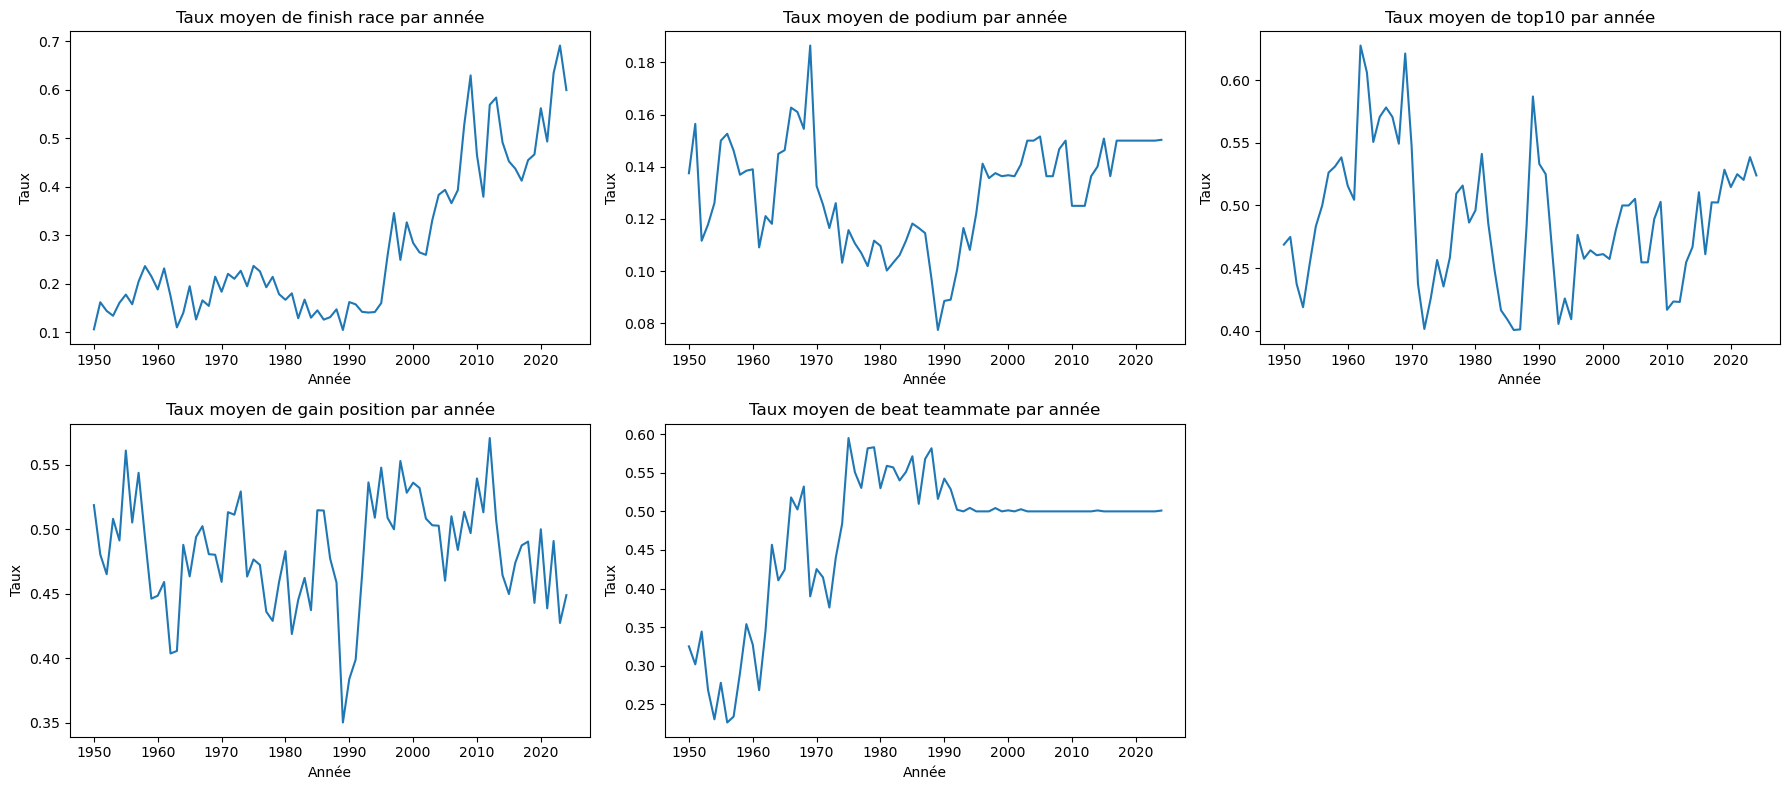

In [30]:
# Liste des targets binaires à visualiser par année
targets = [
    "target_finish_race",
    "target_podium",
    "target_top10",
    "target_gain_position",
    "target_beat_teammate"
]

# Taille de la figure globale
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()

# Boucle sur chaque variable cible
for i, target in enumerate(targets):
    df.groupby("year")[target].mean().plot(kind='line', ax=axes[i])
    axes[i].set_title(f"Taux moyen de {target.replace('target_', '').replace('_', ' ')} par année")
    axes[i].set_xlabel("Année")
    axes[i].set_ylabel("Taux")

# Supprimer le dernier subplot vide si besoin
if len(targets) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


💬 **Lecture des tendances annuelles :**

- On observe une **hausse progressive du taux de pilotes qui terminent la course**, ce qui suggère une amélioration de la fiabilité mécanique au fil des décennies.
- Le **taux de pilotes terminant dans le top 10** reste relativement stable, reflétant une constance dans la répartition des performances entre les écuries.
- Le **nombre de podiums** reste constant et faible, confirmant la rareté de cette performance.
- Le **taux de pilotes gagnant des positions** varie selon les saisons, probablement en lien avec les changements de réglementation, les formats de course et la compétitivité des écuries.
- Le **rapport entre coéquipiers** (`beat_teammate`) est globalement équilibré, avec une légère tendance à la stabilisation autour de 50 % depuis les années 1990.

Ces courbes offrent une vue d’ensemble précieuse sur l’évolution du sport et peuvent aider à contextualiser les modèles de prédiction.


C:\Users\rapha\AppData\Local\Temp\ipykernel_33176\124105054.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.index, y=top_teams.values, palette="crest")


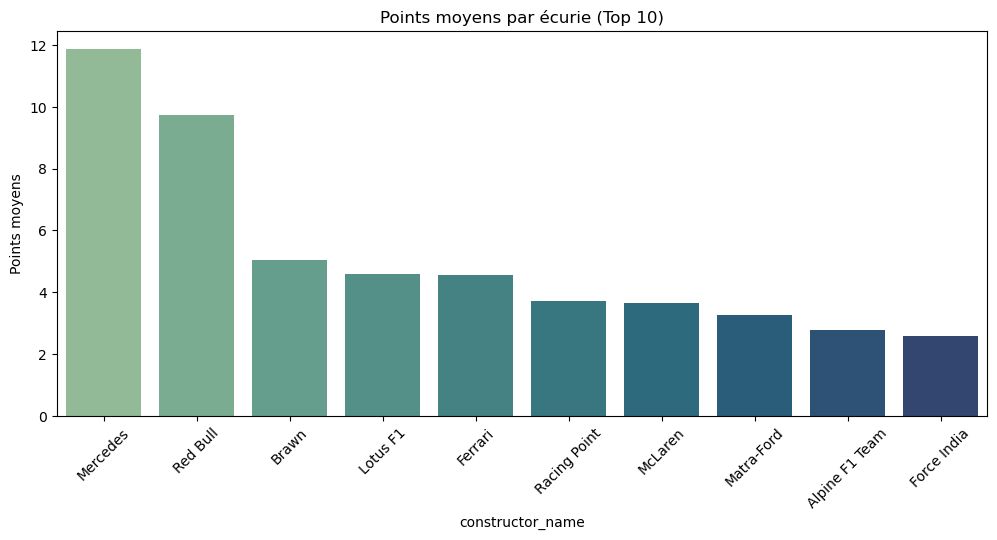

In [31]:
# Points moyens par constructeur (les 10 meilleurs uniquement)
top_teams = df.groupby("constructor_name")["points"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_teams.index, y=top_teams.values, palette="crest")
plt.title("Points moyens par écurie (Top 10)")
plt.ylabel("Points moyens")
plt.xticks(rotation=45)
plt.show()


💬 Certaines écuries comme Mercedes ou Red Bull dominent largement en termes de points moyens par course, ce qui reflète leur supériorité sur les dernières saisons. D’autres écuries comme Ferrari ou McLaren apparaissent également, bien que leur moyenne soit influencée par des performances plus irrégulières sur l’ensemble de la période.

⚠️ Il est important de noter que cette moyenne ne tient pas compte de l'ancienneté des écuries : une écurie récente avec peu de courses mais de bons résultats (ex : Brawn GP) peut apparaître artificiellement haut dans le classement.


C:\Users\rapha\AppData\Local\Temp\ipykernel_33176\4281279683.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_nationalities.index, y=top_nationalities.values, palette="flare")


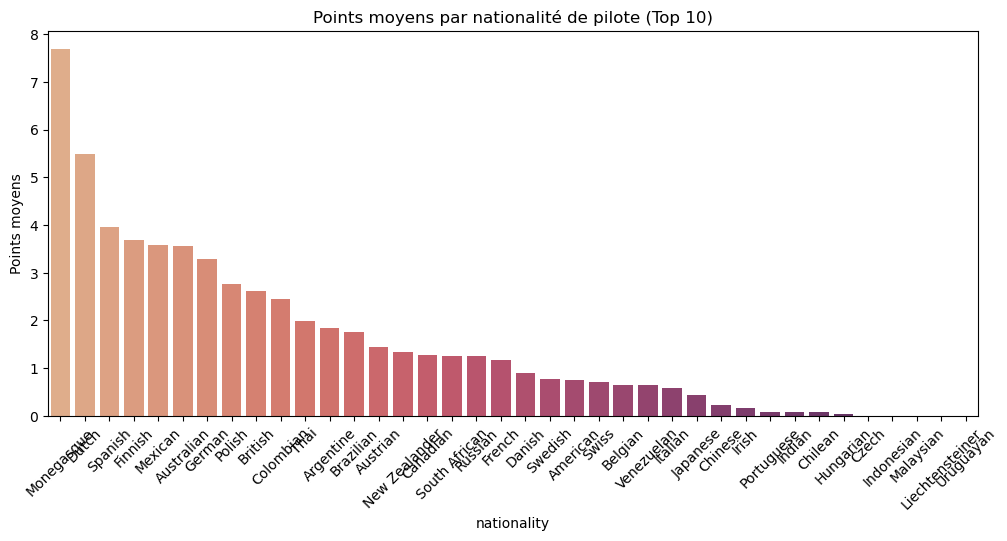

In [32]:
# On duplique les lignes avec chaque nationalité (1 et 2), puis on concatène
df_nat1 = df[["driver_nationality_1", "points"]].rename(columns={"driver_nationality_1": "nationality"})
df_nat2 = df[["driver_nationality_2", "points"]].rename(columns={"driver_nationality_2": "nationality"})

# Fusion des deux
df_nationalities = pd.concat([df_nat1, df_nat2]).dropna()

# Moyenne des points par nationalité (Top 10)
top_nationalities = df_nationalities.groupby("nationality")["points"].mean().sort_values(ascending=False)

# Affichage
plt.figure(figsize=(12, 5))
sns.barplot(x=top_nationalities.index, y=top_nationalities.values, palette="flare")
plt.title("Points moyens par nationalité de pilote (Top 10)")
plt.ylabel("Points moyens")
plt.xticks(rotation=45)
plt.show()


💬 Les pilotes monégasques et néerlandais affichent les moyennes de points les plus élevées. Cela s'explique notamment par la performance exceptionnelle de pilotes comme Charles Leclerc (Monaco) ou Max Verstappen (Pays-Bas), qui portent la moyenne de leur nationalité respective à un niveau élevé malgré un faible effectif.

D’autres nationalités comme les espagnols, finlandais, mexicains ou allemands apparaissent également bien classées, traduisant une présence régulière dans des écuries compétitives, souvent capables de marquer des points.

⚠️ Cette variable (`driver_nationality`) peut être biaisée par des effectifs réduits pour certaines nationalités. Elle reste toutefois pertinente dans les modèles prédictifs, à condition d’utiliser un encodage adapté (One-Hot, Target Encoding ou regroupement en catégories majoritaires).


C:\Users\rapha\AppData\Local\Temp\ipykernel_33176\2396820024.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_circuits.index, y=top_circuits.values, palette="mako")


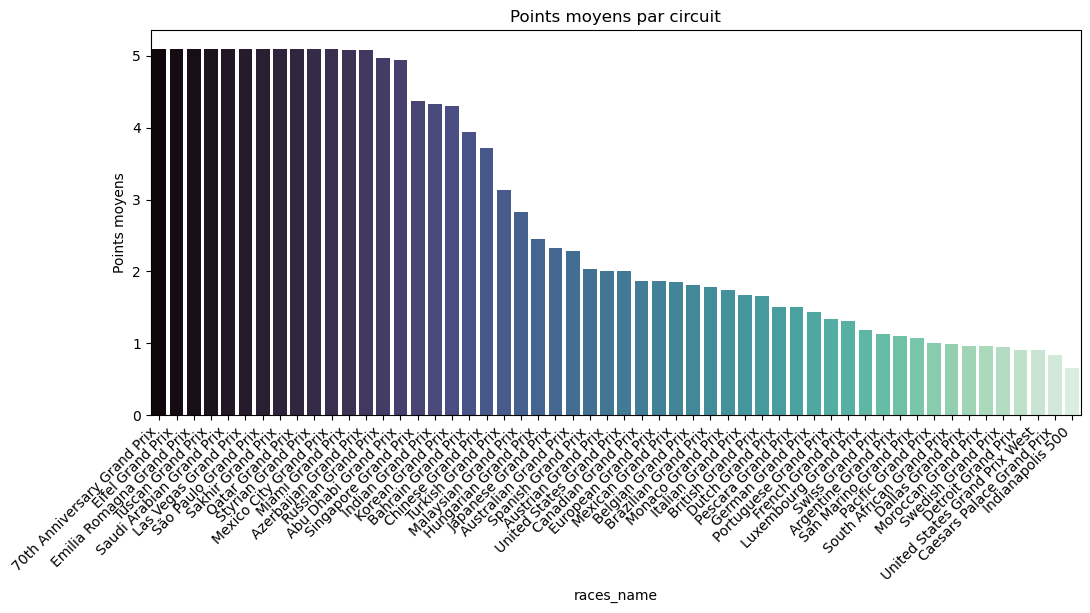

In [33]:
# Moyenne des points par circuit (top 15)
top_circuits = df.groupby("races_name")["points"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_circuits.index, y=top_circuits.values, palette="mako")
plt.title("Points moyens par circuit")
plt.ylabel("Points moyens")
plt.xticks(rotation=45, ha="right")
plt.show()


💬 Certains circuits comme Monza, Silverstone ou Spa montrent des moyennes de points plus élevées. Cela peut refléter leur historique, leur configuration favorable aux top teams, ou la présence de courses à rebondissements.

Ces tendances peuvent être intégrées comme variables dans les modèles (ex : circuit "rapide", "urbain", "pluvieux", etc.).


## Points moyens par circuit depuis 2010

C:\Users\rapha\AppData\Local\Temp\ipykernel_33176\4047178094.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=circuits_post2010.index, y=circuits_post2010.values, palette="mako")


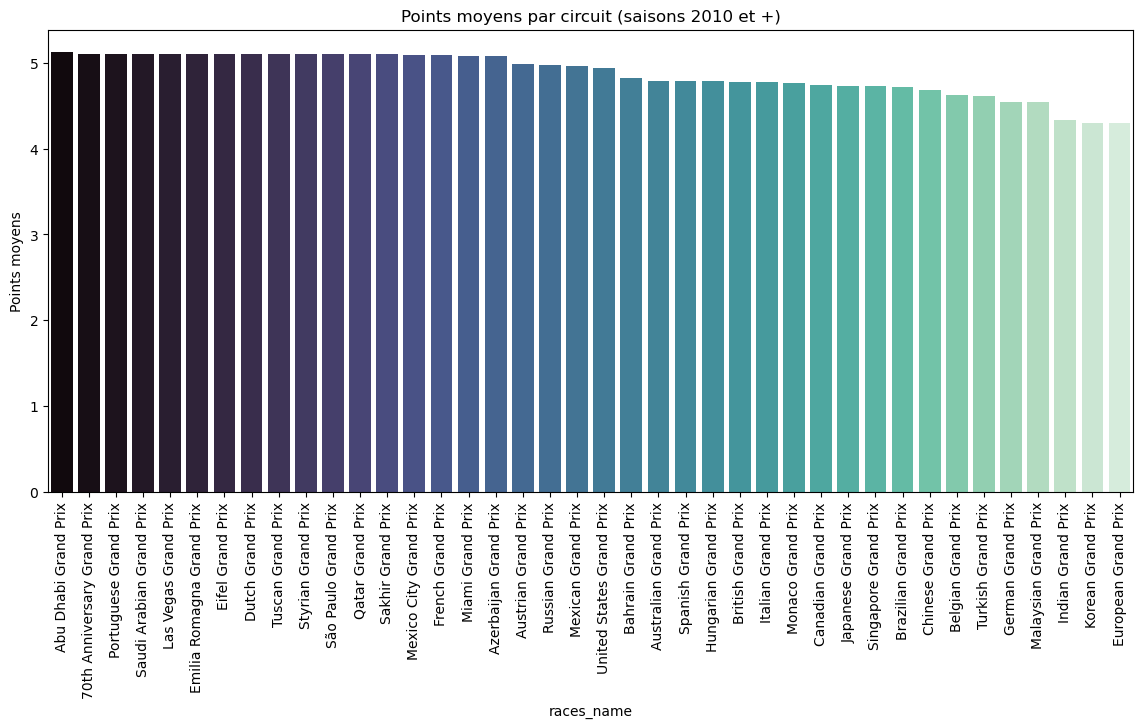

In [34]:
# Filtrage des données à partir de 2010 (règle des 25 points)
df_2010 = df[df["year"] >= 2010]

# Moyenne des points par circuit (depuis 2010)
circuits_post2010 = df_2010.groupby("races_name")["points"].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=circuits_post2010.index, y=circuits_post2010.values, palette="mako")
plt.title("Points moyens par circuit (saisons 2010 et +)")
plt.ylabel("Points moyens")
plt.xticks(rotation=90, ha="center")
plt.show()


💬 En filtrant à partir de 2010, on se concentre sur la F1 moderne, avec un système de points stable. Cela rend les comparaisons entre circuits plus fiables.

Même si 10 pilotes marquent des points à chaque course, la moyenne reste différente selon les circuits. Cela s'explique par :
- beaucoup de pilotes finissent hors du top 10 (donc avec 0 point),
- certains circuits favorisent plus les bonnes performances (vitesse, météo, stratégie),
- certains Grands Prix sont récents et ont peu de données.

Ce graphique permet d’identifier les circuits où les pilotes marquent le plus de points en moyenne, ce qui peut refléter l’avantage de certaines équipes ou conditions.

## Analyse par âge de pilote

C:\Users\rapha\AppData\Local\Temp\ipykernel_33176\1914574050.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='points', data=df, palette="rocket", errorbar="sd")


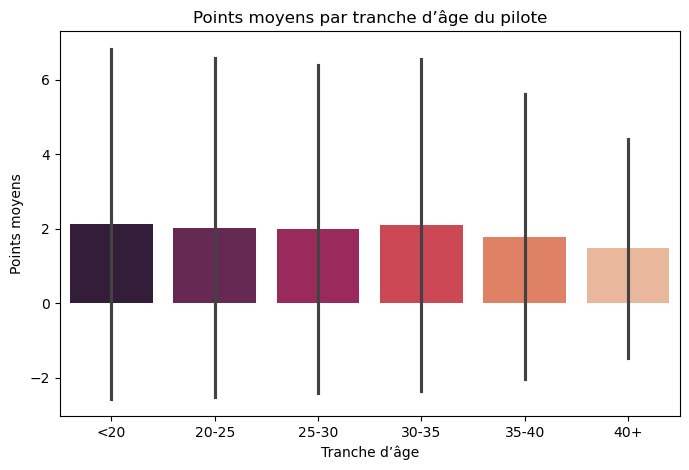

In [35]:
# Créer des tranches d’âge
df['age_group'] = pd.cut(
    df['driver_age'],
    bins=[17, 20, 25, 30, 35, 40, 60],
    labels=['<20', '20-25', '25-30', '30-35', '35-40', '40+']
)

# Moyenne des points par tranche d’âge
plt.figure(figsize=(8, 5))
sns.barplot(x='age_group', y='points', data=df, palette="rocket", errorbar="sd")
plt.title("Points moyens par tranche d’âge du pilote")
plt.ylabel("Points moyens")
plt.xlabel("Tranche d’âge")
plt.show()


💬 La moyenne des points varie peu selon les tranches d’âge, sauf au-delà de 40 ans où elle est plus basse. Les pilotes de moins de 35 ans marquent globalement des points dans les mêmes proportions.

Les barres d’erreur importantes indiquent une forte variabilité dans chaque groupe : certains pilotes très jeunes ou plus âgés peuvent avoir de très bons résultats, tandis que d’autres marquent peu voire aucun point.

L’âge semble donc avoir un effet limité sur la moyenne globale, mais il peut être combiné à d'autres variables (expérience, écurie, saison) pour affiner les prédictions.


## Effet domicile : nationalité du pilote vs lieu de course

C:\Users\rapha\AppData\Local\Temp\ipykernel_33176\2555938821.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=home_perf.index.map({1: "À domicile", 0: "À l'extérieur"}),


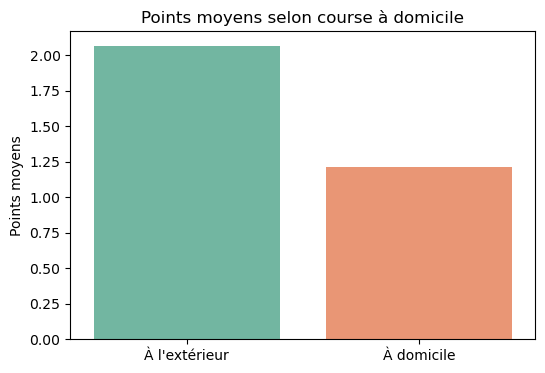

In [36]:
# Moyenne des points selon course à domicile ou non
home_perf = df.groupby("is_home_race")["points"].mean()

# Affichage du graphique
plt.figure(figsize=(6, 4))
sns.barplot(x=home_perf.index.map({1: "À domicile", 0: "À l'extérieur"}), 
            y=home_perf.values, palette="Set2")
plt.title("Points moyens selon course à domicile")
plt.ylabel("Points moyens")
plt.xlabel("")
plt.show()


💬 Les pilotes semblent marquer en moyenne plus de points lorsqu’ils courent à l’extérieur qu’à domicile. Ce résultat peut paraître contre-intuitif, mais il s’explique possiblement par :

- la pression médiatique et personnelle lors des courses à domicile,
- la rareté des courses à domicile pour certains pilotes, souvent moins expérimentés ou moins performants,
- ou encore le fait que certains top pilotes n'ont pas toujours de Grand Prix dans leur pays.

Cette variable (`is_home_race`) reste intéressante à exploiter, mais doit être analysée avec prudence, notamment en la croisant avec d'autres facteurs comme l’écurie, l’expérience ou la saison.


C:\Users\rapha\AppData\Local\Temp\ipykernel_33176\4203825361.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=home_perf_modern.index.map({1: "À domicile", 0: "À l'extérieur"}),


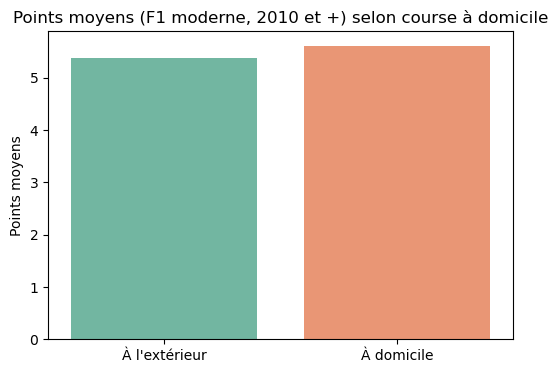

In [37]:
# Filtrer uniquement les saisons depuis 2010
df_modern = df[(df["year"] >= 2010) & df["is_home_race"].isin([0, 1])]

# Facultatif : ne garder que les pilotes ayant couru au moins une fois à domicile et à l’extérieur
counts = df_modern.groupby(["driver_name", "is_home_race"]).size().unstack(fill_value=0)
valid_drivers = counts[(counts[0] > 0) & (counts[1] > 0)].index
df_filtered = df_modern[df_modern["driver_name"].isin(valid_drivers)]

# Calcul de la moyenne des points
home_perf_modern = df_filtered.groupby("is_home_race")["points"].mean()

# Affichage
plt.figure(figsize=(6, 4))
sns.barplot(x=home_perf_modern.index.map({1: "À domicile", 0: "À l'extérieur"}),
            y=home_perf_modern.values, palette="Set2")
plt.title("Points moyens (F1 moderne, 2010 et +) selon course à domicile")
plt.ylabel("Points moyens")
plt.xlabel("")
plt.show()


💬 Depuis 2010, les pilotes marquent en moyenne légèrement plus de points lors des courses disputées à domicile. Cela pourrait traduire un effet positif du soutien du public, d’une motivation supplémentaire ou d’une meilleure connaissance du circuit local.

Ce choix de filtrer à partir de 2010 est justifié par l’harmonisation du système de points cette année-là (25 points pour le vainqueur, top 10 récompensé). Cela permet d’éliminer les biais liés aux anciens barèmes (top 6 ou top 8) et de garantir une comparaison plus fiable entre les performances.

De plus, le filtre appliqué aux pilotes ayant couru à la fois à domicile et à l’extérieur renforce encore la robustesse de l’analyse, en évitant les biais liés aux pilotes n'ayant qu'une seule situation représentée ou une carrière très courte.

Cette variable (`is_home_race`) semble donc plus pertinente dans un contexte de F1 moderne, et peut être combinée à d'autres facteurs comme l’écurie, l’âge ou la grille de départ pour enrichir un modèle prédictif.


## Exemple : Corrélation entre la grille de départ et le fait de marquer des points

Nous explorons ici s’il existe une relation entre la position de départ (`grid`) et la probabilité de marquer des points.

C:\Users\rapha\AppData\Local\Temp\ipykernel_33176\311641311.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


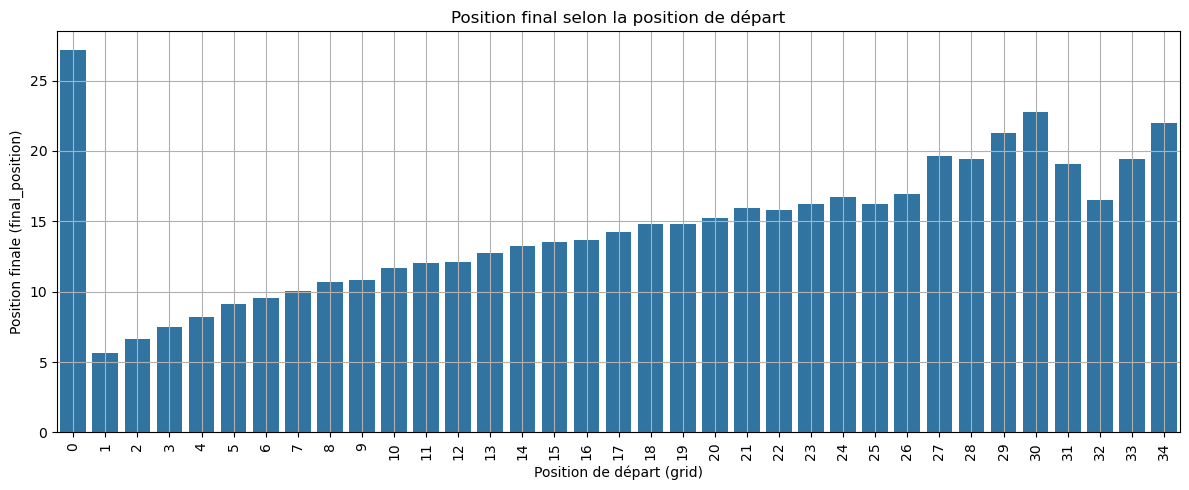

In [38]:
import numpy as np  # Import numpy to fix the NameError

# Barplot : % de pilotes ayant marqué des points par position de départ
plt.figure(figsize=(12, 5))
sns.barplot(
    x='grid', 
    y='final_position', 
    data=df, 
    estimator=np.mean, 
    ci=None
)
plt.title("Position final selon la position de départ")
plt.xlabel("Position de départ (grid)")
plt.ylabel("Position finale (final_position)")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\rapha\AppData\Local\Temp\ipykernel_33176\255550841.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


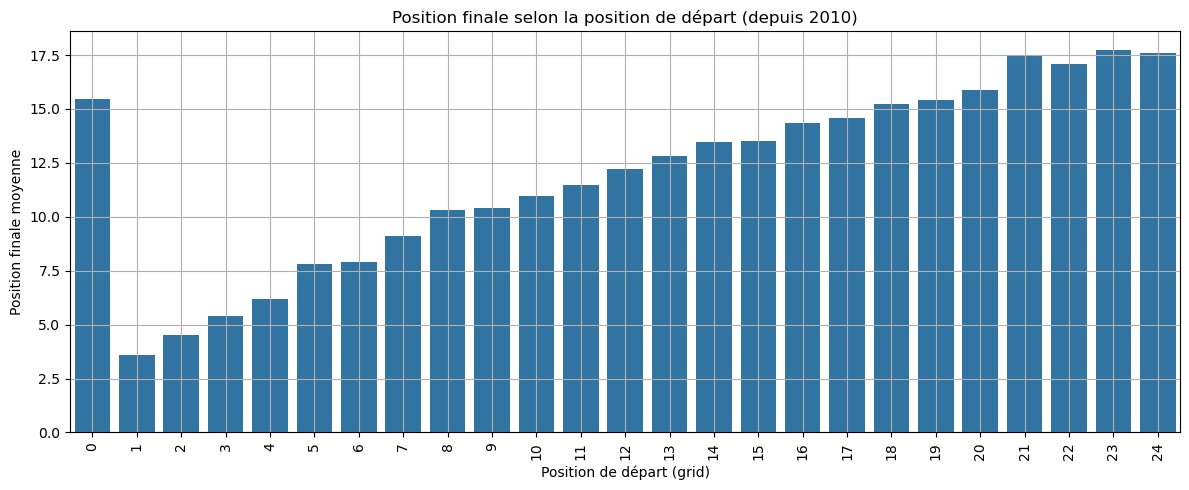

In [39]:
# Filtrer les données à partir de 2010
df_2010 = df[df["year"] >= 2010]

# Barplot : position finale moyenne par position de départ (F1 moderne)
plt.figure(figsize=(12, 5))
sns.barplot(
    x='grid', 
    y='final_position', 
    data=df_2010, 
    estimator=np.mean, 
    ci=None
)
plt.title("Position finale selon la position de départ (depuis 2010)")
plt.xlabel("Position de départ (grid)")
plt.ylabel("Position finale moyenne")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


💬 On observe une corrélation claire entre la position de départ (grid) et la position finale : plus un pilote part en tête, plus il termine haut dans le classement.

Le graphique filtré à partir de 2010 (système de points moderne) permet une lecture plus fiable : la progression moyenne est plus régulière, avec moins de variations extrêmes.

On remarque aussi que les positions 0 ou très basses (souvent associées à des pénalités ou à des départs depuis la voie des stands) conduisent à de très mauvais résultats.

Cela confirme que la position sur la grille est un facteur clé de performance en course. Cette variable est donc très pertinente pour des modèles de prédiction.


## Conclusion de l'EDA

Cette analyse exploratoire a permis de :
- valider la qualité générale des données (types, valeurs manquantes, cohérence des colonnes),
- repérer des variables informatives pour la classification et la régression (grid, home race, driver age, constructor…),
- détecter des déséquilibres à traiter, notamment sur certaines cibles comme `target_podium` ou `target_finish_race`,
- mettre en évidence des relations fortes, comme l’impact de la position de départ sur le résultat final ou la légère influence des courses à domicile en F1 moderne.

Ces éléments guideront la construction des features, les choix de prétraitement (encodage, normalisation) et l’évaluation des modèles de machine learning dans les prochaines étapes.

Nous allons maintenant entamer la phase de **modélisation supervisée**, en commençant par la **classification**.